# <font color=green>Aula 1 – Conhecendo os Dados e Explorando

## <font color = blue>Limpando os dados e visualizando uma distribuição

In [1]:
import pandas as pd

tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [2]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000')

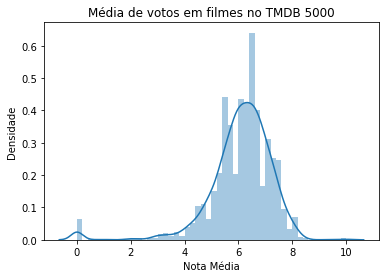

In [3]:
import seaborn as sns

ax = sns.distplot(tmdb.vote_average)
ax.set(xlabel='Nota Média', ylabel='Densidade')
ax.set_title('Média de votos em filmes no TMDB 5000')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000')

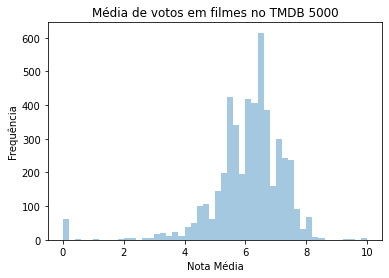

In [4]:
ax = sns.distplot(tmdb.vote_average, norm_hist=False, kde=False)
ax.set(xlabel='Nota Média', ylabel='Frequência')
ax.set_title('Média de votos em filmes no TMDB 5000')

Text(0.5, 1.0, 'Distribuição de nota média dos filmes do TMDB 5000')

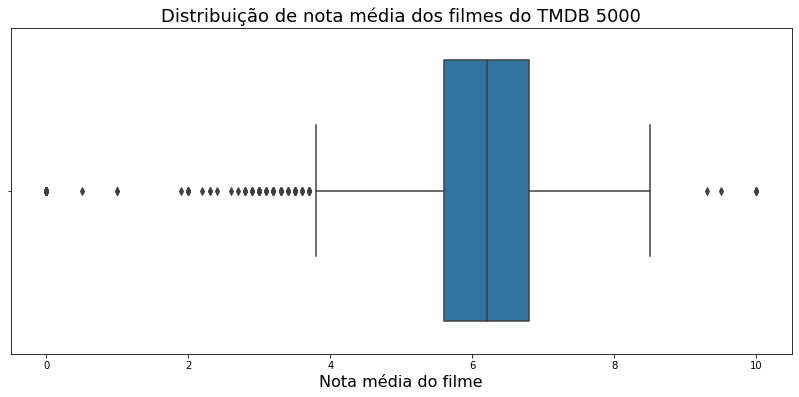

In [5]:
ax = sns.boxplot(x=tmdb.vote_average)
ax.figure.set_size_inches(14,6)
ax.set_xlabel('Nota média do filme', fontsize=16)
ax.set_title('Distribuição de nota média dos filmes do TMDB 5000', fontsize=18)

### <font color = pink> Tem algo estranho... Não faz sentido filmes com nota média 0 ou 10...

In [6]:
tmdb.query("vote_average == 0").head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0


In [7]:
tmdb.query("vote_average == 0").shape[0]

63

### <font color=pink>Analisamos que alguns filmes tiveram poucos ou nenhum voto. Decidimos que esses filmes não devem pertencer a nossa análise

In [8]:
tmdb_com_mais_de_10_votos = tmdb.query('vote_count >= 10')
tmdb_com_mais_de_10_votos.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos')

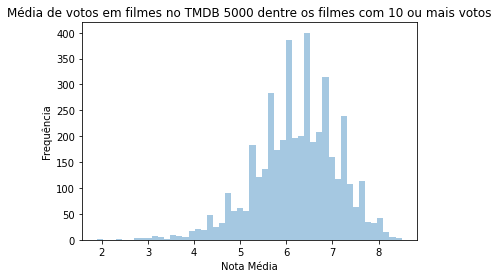

In [9]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average, norm_hist=False, kde=False)
ax.set(xlabel='Nota Média', ylabel='Frequência')
ax.set_title('Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos')

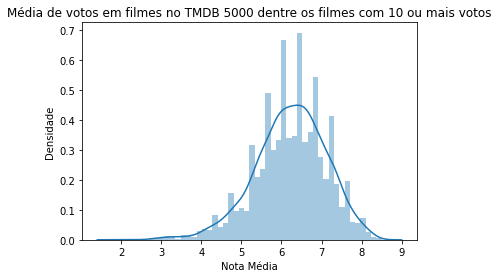

In [10]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel='Nota Média', ylabel='Densidade')
ax.set_title('Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos')

#### <font color=pink>Gráfico cumulativo da média das notas por porcentagem cumulativa de filme
Esse gráfico foi aprendido lá na parte de 'visualizando a CDF', mas trouxe para cá para ver o resultado nesses dados também.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000 com 10 ou mais votos')

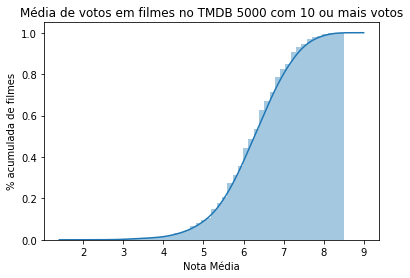

In [11]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average,
                  kde_kws={'cumulative': True},
                  hist_kws={'cumulative': True})
ax.set(xlabel='Nota Média', ylabel='% acumulada de filmes')
ax.set_title('Média de votos em filmes no TMDB 5000 com 10 ou mais votos')

## <font color = blue>Visualizando e limpando o movielens

In [12]:
notas = pd.read_csv('ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
nota_media_por_filme = notas.groupby('movieId').mean()['rating']
nota_media_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no Movielens 100K')

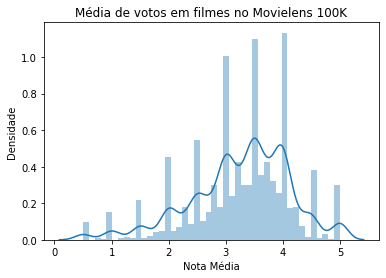

In [14]:
ax = sns.distplot(nota_media_por_filme.values)
ax.set(xlabel='Nota Média', ylabel='Densidade')
ax.set_title('Média de votos em filmes no Movielens 100K')

In [15]:
quantidade_de_votos_por_filme = notas.groupby("movieId").count()
filmes_com_pelo_menos_10_votos = quantidade_de_votos_por_filme.query('rating >= 10').index
filmes_com_pelo_menos_10_votos.values

array([     1,      2,      3, ..., 177765, 179819, 187593])

In [16]:
nota_media_dos_filmes_com_pelo_menos_10_votos = nota_media_por_filme.loc[filmes_com_pelo_menos_10_votos.values]
nota_media_dos_filmes_com_pelo_menos_10_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no Movielens 100K com 10 ou mais votos')

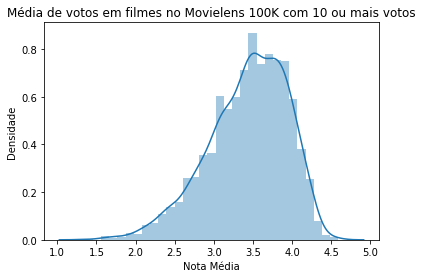

In [17]:
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(xlabel='Nota Média', ylabel='Densidade')
ax.set_title('Média de votos em filmes no Movielens 100K com 10 ou mais votos')

Text(0.5, 1.0, 'Distribuição de nota média dos filmes do Movielens 100k dentre os filmes com 10 ou mais votos')

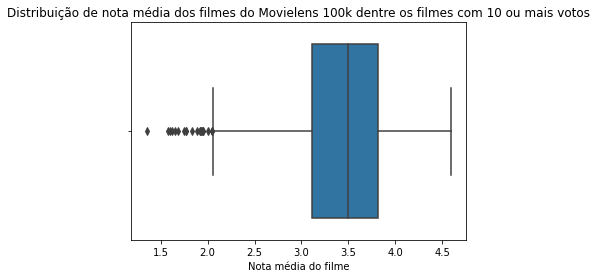

In [18]:
ax = sns.boxplot(x=nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set_xlabel('Nota média do filme')
ax.set_title('Distribuição de nota média dos filmes do Movielens 100k dentre os filmes com 10 ou mais votos')

## <font color=blue>Visualizando a CDF

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Média de votos em filmes no Movielens 100K com 10 ou mais votos')

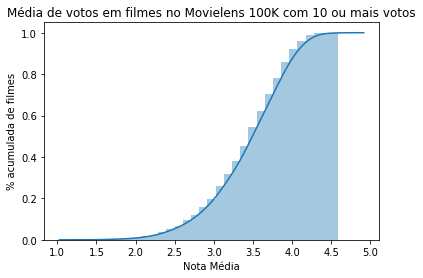

In [19]:
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values,
                  kde_kws={'cumulative': True},
                  hist_kws={'cumulative': True})
ax.set(xlabel='Nota Média', ylabel='% acumulada de filmes')
ax.set_title('Média de votos em filmes no Movielens 100K com 10 ou mais votos')

# <font color=green>Aula 2 – Explorando as Distribuições das Amostras

## <font color=blue>Visualizando outras informações e quantis quaisquer de forma numérica

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Número de votos em filmes no TMDB 5000 com 10 ou mais votos')

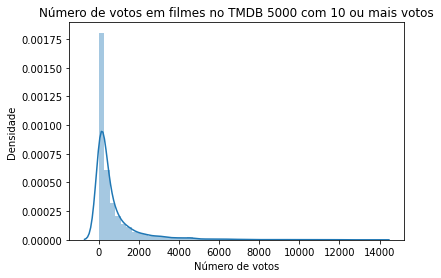

In [20]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_count)
ax.set(xlabel='Número de votos', ylabel='Densidade')
ax.set_title('Número de votos em filmes no TMDB 5000 com 10 ou mais votos')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Gatos em filmes no TMDB 5000')

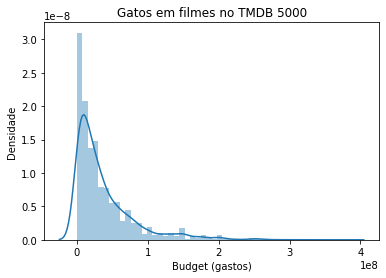

In [21]:
ax = sns.distplot(tmdb.query('budget > 0').budget)
ax.set(xlabel='Budget (gastos)', ylabel='Densidade')
ax.set_title('Gatos em filmes no TMDB 5000')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularidade em filmes no TMDB 5000')

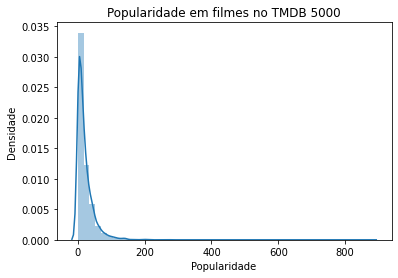

In [22]:
ax = sns.distplot(tmdb.popularity)
ax.set(xlabel='Popularidade', ylabel='Densidade')
ax.set_title('Popularidade em filmes no TMDB 5000')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Tempo de Duração em filmes no TMDB 5000')

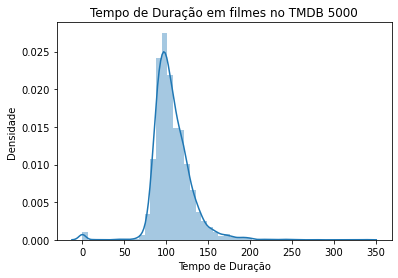

In [23]:
ax = sns.distplot(tmdb.runtime)
ax.set(xlabel='Tempo de Duração', ylabel='Densidade')
ax.set_title('Tempo de Duração em filmes no TMDB 5000')

In [24]:
tmdb.runtime.isnull().sum()

2

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularidade em filmes no TMDB 5000')

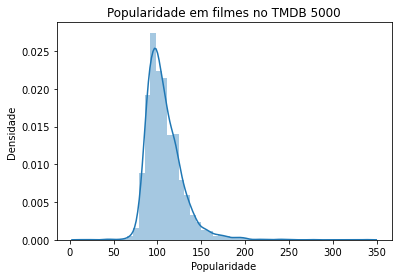

In [25]:
ax = sns.distplot(tmdb.query('runtime>0').runtime.dropna())
ax.set(xlabel='Popularidade', ylabel='Densidade')
ax.set_title('Popularidade em filmes no TMDB 5000')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularidade em filmes no TMDB 5000')

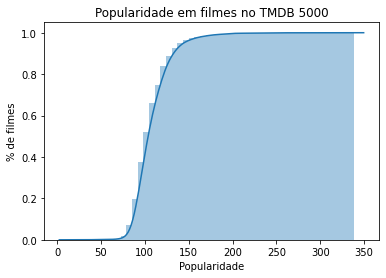

In [26]:
ax = sns.distplot(tmdb.query('runtime>0').runtime.dropna(),
                  hist_kws={'cumulative':True},
                  kde_kws={'cumulative':True})
ax.set(xlabel='Popularidade', ylabel='% de filmes')
ax.set_title('Popularidade em filmes no TMDB 5000')

In [27]:
tmdb.query('runtime>0').runtime.dropna().quantile(.8)

121.0

# <font color = green>Aula 3 – Testes de Uma Amostra

## <font color=blue>O efeito do tamanho de uma amostra

In [28]:
print(f'Média dos filmes com pelo menos 10 votos: {nota_media_dos_filmes_com_pelo_menos_10_votos.mean()}')

Média dos filmes com pelo menos 10 votos: 3.4320503405352603


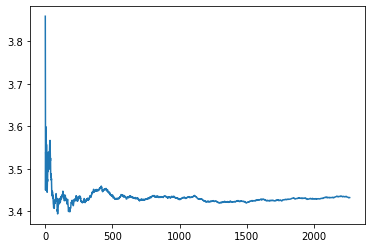

In [29]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(75243)
temp = nota_media_dos_filmes_com_pelo_menos_10_votos.sample(frac=1)

medias = [temp[0:i].mean() for i in range(1, len(temp))]

plt.plot(medias)

In [30]:
len(nota_media_dos_filmes_com_pelo_menos_10_votos)

2269

## <font color=blue>Intervalo de confiança da média com t e ztest

In [31]:
from statsmodels.stats.weightstats import zconfint

zconfint(nota_media_dos_filmes_com_pelo_menos_10_votos)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(3.4112459477469557, 3.452854733323563)

In [32]:
from statsmodels.stats.weightstats import DescrStatsW

descr_todos_com_10_votos = DescrStatsW(nota_media_dos_filmes_com_pelo_menos_10_votos)
descr_todos_com_10_votos.tconfint_mean()

(3.411234839229381, 3.4528658418411395)

# <font color=green>Aula 4 – Outros Testes

## <font color=blue>Zteste para uma amostra

In [33]:
filmes = pd.read_csv('movies.csv')
filmes.query('movieId==1')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [34]:
notas1 = notas.query('movieId==1')
notas1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribuição das notas para o Toy Story')

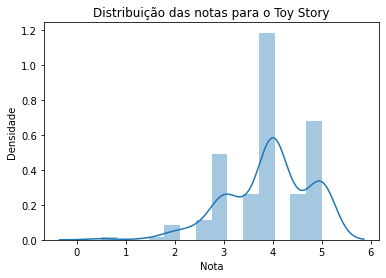

In [35]:
ax = sns.distplot(notas1.rating)
ax.set(xlabel='Nota', ylabel='Densidade')
ax.set_title('Distribuição das notas para o Toy Story')

Text(0.5, 1.0, 'Distribuição das notas para o Toy Story')

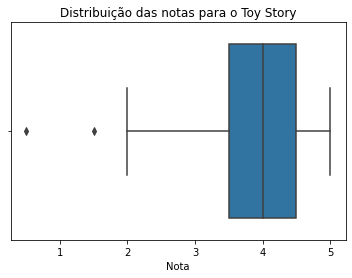

In [36]:
ax = sns.boxplot(x=notas1.rating)
ax.set_xlabel('Nota')
ax.set_title('Distribuição das notas para o Toy Story')

In [37]:
notas1.rating.mean()

3.9209302325581397

In [38]:
notas1.rating.count()

215

In [39]:
zconfint(notas1.rating)

(3.8093359183563402, 4.032524546759939)

In [40]:
from statsmodels.stats.weightstats import ztest

ztest(notas1.rating, value = 3.4320503405352603)

(8.586342305916716, 8.978190401886942e-18)

## <font color = blue> Problemas de amostras pequenas

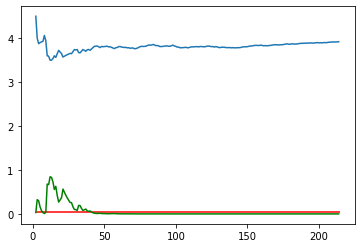

In [41]:
np.random.seed(75241)
temp = notas1.rating.sample(frac=1)

def calcula_teste(i):
  media = temp[0:i].mean()
  stat, p = ztest(temp[0:i], value = 3.4320503405352603)
  return (i, media, p)

valores = np.array([calcula_teste(i) for i in range(2, len(temp))])

plt.plot(valores[:,0], valores[:,1])
plt.plot(valores[:,0], valores[:,2], color='g')
plt.hlines(y=0.05, xmin= 2, xmax=len(temp), colors='r')

In [42]:
valores

array([[2.00000000e+00, 4.50000000e+00, 3.26876211e-02],
       [3.00000000e+00, 4.00000000e+00, 3.25254351e-01],
       [4.00000000e+00, 3.87500000e+00, 2.99521970e-01],
       [5.00000000e+00, 3.90000000e+00, 1.58267818e-01],
       [6.00000000e+00, 3.91666667e+00, 7.40693646e-02],
       [7.00000000e+00, 3.92857143e+00, 3.05837219e-02],
       [8.00000000e+00, 4.06250000e+00, 8.54684682e-03],
       [9.00000000e+00, 3.94444444e+00, 3.43513698e-02],
       [1.00000000e+01, 3.60000000e+00, 6.79775744e-01],
       [1.10000000e+01, 3.59090909e+00, 6.66104056e-01],
       [1.20000000e+01, 3.50000000e+00, 8.45259443e-01],
       [1.30000000e+01, 3.50000000e+00, 8.31972270e-01],
       [1.40000000e+01, 3.53571429e+00, 7.28503654e-01],
       [1.50000000e+01, 3.60000000e+00, 5.56156495e-01],
       [1.60000000e+01, 3.56250000e+00, 6.28416636e-01],
       [1.70000000e+01, 3.64705882e+00, 4.20561961e-01],
       [1.80000000e+01, 3.72222222e+00, 2.69271809e-01],
       [1.90000000e+01, 3.68421

# <font color=green>Aula 5 – Testes Para Duas Amostras

## <font color=blue>Comparando a média de duas amostras

In [46]:
print(ztest(notas1.rating, notas.rating))
zconfint(notas1.rating, notas.rating)

(5.894327101501841, 3.762112778881965e-09)


(0.2799245129192442, 0.5588219849631111)

In [47]:
print(ztest(notas.rating, notas1.rating))
zconfint(notas.rating, notas1.rating)

(-5.894327101501841, 3.762112778881965e-09)


(-0.5588219849631111, -0.2799245129192442)

In [49]:
from scipy.stats import ttest_ind

ttest_ind(notas.rating, notas1.rating)

Ttest_indResult(statistic=-5.894327101501841, pvalue=3.774003138720876e-09)

In [57]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1.rating)
comparacao = descr_todas_as_notas.get_compare(descr_toystory)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


In [60]:
comparacao.summary(use_t=False)

,coef,std err,z,P>|z|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


## <font color=blue>Visualizando graficamente

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Distribuição das notas de acordo com filmes')

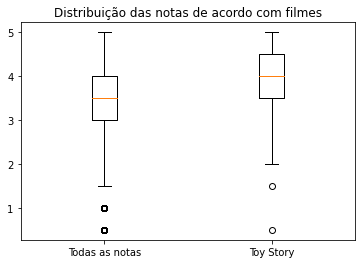

In [65]:
plt.boxplot([notas.rating, notas1.rating], labels=['Todas as notas', 'Toy Story'])
plt.title('Distribuição das notas de acordo com filmes')

## <font color=blue>Cuidado ao interpretar o intervalo de confiança

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Distribuição das notas de acordo com filmes')

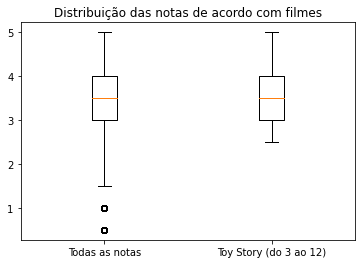

In [66]:
plt.boxplot([notas.rating, notas1[3:12].rating], labels=['Todas as notas', 'Toy Story (do 3 ao 12)'])
plt.title('Distribuição das notas de acordo com filmes')

In [71]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toystory = DescrStatsW(notas1[3:12].rating)
comparacao = descr_todas_as_notas.get_compare(descr_toystory)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0540,0.348,-0.155,0.877,-0.735,0.627
